In [126]:
import matplotlib.pylab as plt

In [127]:
import pandas as pd

data=pd.read_csv("/Users/fahad/Desktop/query-hive-5142_harvard_stored_coordinates_v2.csv")
data['ones']=1

In [128]:
filtered_data=data#[(data['ghash']=='drt3j9t') | (data['ghash']=='drt3j9v')]

In [129]:
import matplotlib.pylab as plt
lats=[];
lngs=[];
for i in filtered_data.iterrows():
    if i[1]['paname']=='Capital One Café':
        lats.append(i[1]['lat'])
        lngs.append(i[1]['lng'])



In [130]:
#dont run this it will open a new tab to show the map
import mplleaflet
plt.plot(lngs[1:2000],lats[1:2000],'r.')

mplleaflet.show(tiles='esri_worldtopo')

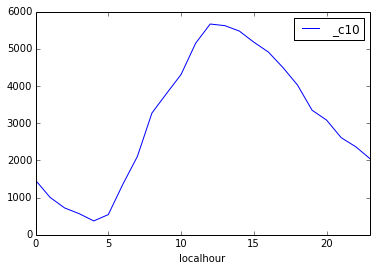

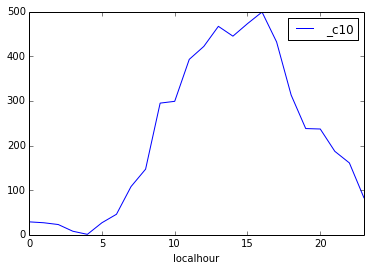

In [131]:
import matplotlib.pylab as plt
%matplotlib inline
sub=data[data['paname']=='Harvard University'].groupby('localhour').sum()
sub.plot(y='_c10')
sub=data[data['paname']=='Harvard Coop'].groupby('localhour').sum()
sub.plot(y='_c10')

In [132]:
a=data.groupby('paname').sum()

a.sort_values('ones',ascending=False)

,lat,lng,localyear,localmonth,localday,localhour,duration,_c10,ones
paname,,,,,,,,,
Harvard University,2.167831e+06,-3.638428e+06,103242898,293004,896824,691715,16757485,73500,51161
CVS Pharmacy,2.097089e+05,-3.519678e+05,9987082,28591,84235,72075,1487388,7055,4949
Russell House Tavern,1.770777e+05,-2.972086e+05,8433222,24373,69291,61886,1237448,6123,4179
Pinkberry,1.702988e+05,-2.858273e+05,8110342,22540,73406,57409,881417,5592,4019
Harvard Coop,1.580112e+05,-2.652041e+05,7525122,21832,63469,53405,1202313,5360,3729
The Hahvahd Tour,1.575874e+05,-2.644916e+05,7504942,21891,60754,52004,1176531,5354,3719
John Harvard's Brew House,1.283038e+05,-2.153494e+05,6110504,17685,49230,44449,1084427,4641,3028
Starbucks,1.117384e+05,-1.875415e+05,5321466,14768,46386,37512,789937,3497,2637
Harvard Yard,1.061042e+05,-1.780758e+05,5053072,12664,54239,31195,457215,3267,2504


In [156]:
import urllib
import matplotlib.pylab as plt
%matplotlib inline
import math


zoomlevel=16;


#bottom left corner
w=800;
h=800;
zoom=10;
lat=33.80;
lng=-118.0;
scale=1;

#query="https://www.mapquestapi.com/staticmap/v5/map?key=dnWWKMm4BMsnCcpCn6tWUhItsEPAENAN&format=PNG&boundingBox="
#+str(tr_corner[0])+","+str(tr_corner[1])+","+str(bl_corner[0])+","+str(bl_corner[1])+"&margin=0&size="
#+str(w)+","+str(h)+"@"+str(z)+"x";
query="https://api.mapbox.com/v4/mapbox.dark/"+str(lng)+","+str(lat)+","+str(zoom)+"/"+str(w)+"x"+str(h)+".png?access_token=pk.eyJ1IjoiZmFjdHVhbGZhaGFkIiwiYSI6ImNqamtnc2xiMDFrMGUzcXQ3aGx3ajFmaWYifQ.aBY2EfYE5uHmJD2lO9ZZgA"
print(query);
pic=urllib.urlretrieve(query, "mapbox_base_LA.png")



def getPointLatLng(x, y):
    parallelMultiplier = math.cos(lat * math.pi / 180)
    degreesPerPixelX = 360 / math.pow(2, zoom + 8)
    degreesPerPixelY = 360 / math.pow(2, zoom + 8) * parallelMultiplier;
    pointLat = lat - degreesPerPixelY * ( y - h / 2)
    pointLng = lng + degreesPerPixelX * ( x  - w / 2)

    return (pointLat, pointLng)

def reverse_getPointLatLng(pointLat, pointLng):
    parallelMultiplier = math.cos(lat * math.pi / 180)
    degreesPerPixelX = 360 / math.pow(2, zoom + 8)
    degreesPerPixelY = 360 / math.pow(2, zoom + 8) * parallelMultiplier;
    #pointLat = lat - degreesPerPixelY * ( y - h / 2)
    #pointLng = lng + degreesPerPixelX * ( x  - w / 2)
    y=scale*((2*(lat-pointLat)/(degreesPerPixelY))+h)/2;
    x=scale*((2*(pointLng-lng)/(degreesPerPixelX))+w)/2;
    return (x, y)



https://api.mapbox.com/v4/mapbox.dark/-118.0,33.8,10/800x800.png?access_token=pk.eyJ1IjoiZmFjdHVhbGZhaGFkIiwiYSI6ImNqamtnc2xiMDFrMGUzcXQ3aGx3ajFmaWYifQ.aBY2EfYE5uHmJD2lO9ZZgA


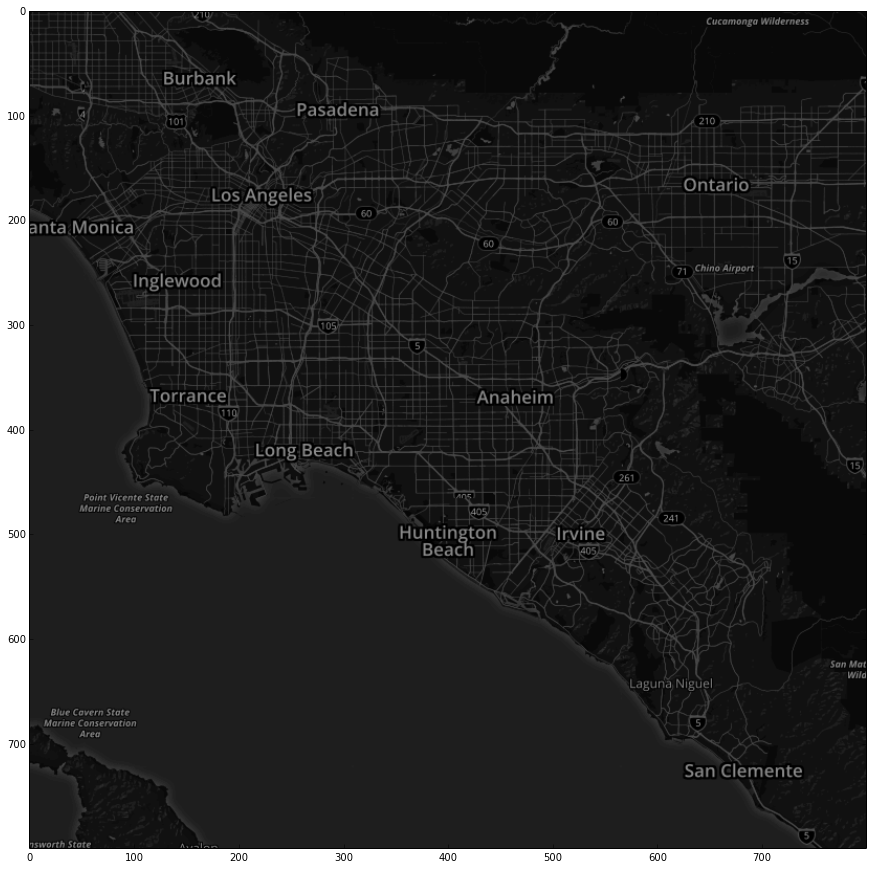

In [28]:
import matplotlib.pylab as plt
%matplotlib inline


pic=plt.imread('mapbox_base_LA.png')
plt.figure(figsize=(15,15))
plt.imshow(pic)
#plt.plot(lats_corrected,lngs_corrected,'*')
#plt.xlim([0,scale*w]);
#plt.ylim([scale*h,0]);

In [154]:
w=1000;
h=1000;
z=2;

def getPointLatLng(x, y):
    parallelMultiplier = math.cos(lat * math.pi / 180)
    degreesPerPixelX = 360 / math.pow(2, zoom + 8)
    degreesPerPixelY = 360 / math.pow(2, zoom + 8) * parallelMultiplier;
    pointLat = lat - degreesPerPixelY * ( y - h / 2)
    pointLng = lng + degreesPerPixelX * ( x  - w / 2)

    return (pointLat, pointLng)

def reverse_getPointLatLng(pointLat, pointLng):
    parallelMultiplier = math.cos(lat * math.pi / 180)
    degreesPerPixelX = 360 / math.pow(2, zoom + 8)
    degreesPerPixelY = 360 / math.pow(2, zoom + 8) * parallelMultiplier;
    #pointLat = lat - degreesPerPixelY * ( y - h / 2)
    #pointLng = lng + degreesPerPixelX * ( x  - w / 2)
    y=((2*(lat-pointLat)/(degreesPerPixelY))+h)/2;
    x=((2*(pointLng-lng)/(degreesPerPixelX))+w)/2;
    return (x, y)

Filtering the data to fit the map

In [30]:
import pandas as pd


In [139]:
la_data=pd.read_csv("la_data",delimiter='\t',names=['lat','lng','localday','localhour','count']);

In [140]:
la_data

,lat,lng,localday,localhour,count
0,33.344,-118.333,3,19,5
1,33.344,-118.333,3,21,4
2,33.344,-118.332,4,13,2
3,33.344,-118.332,4,17,4
4,33.344,-118.331,3,16,6
5,33.344,-118.331,3,21,15
6,33.344,-118.331,3,22,13
7,33.344,-118.331,4,23,17
8,33.344,-118.330,3,8,19
9,33.344,-118.330,3,20,4


In [157]:
temp1=getPointLatLng(0,0);
temp2=getPointLatLng(800,800);
min_lat=min(temp1[0],temp2[0]);
max_lat=max(temp1[0],temp2[0]);

min_lng=min(temp1[1],temp2[1]);
max_lng=max(temp1[1],temp2[1]);

print min_lat,max_lat
print min_lng,max_lng


33.3435265977 34.2564734023
-118.549316406 -117.450683594


In [142]:
la_data[(la_data['lat']>=min_lat) & (la_data['lat']<=max_lat )]

,lat,lng,localday,localhour,count
0,33.344,-118.333,3,19,5
1,33.344,-118.333,3,21,4
2,33.344,-118.332,4,13,2
3,33.344,-118.332,4,17,4
4,33.344,-118.331,3,16,6
5,33.344,-118.331,3,21,15
6,33.344,-118.331,3,22,13
7,33.344,-118.331,4,23,17
8,33.344,-118.330,3,8,19
9,33.344,-118.330,3,20,4


In [143]:
la_data['normed_lat']=(la_data['lat']-min_lat)/(max_lat-min_lat);
la_data['normed_lng']=(la_data['lng']-min_lng)/(max_lng-min_lng);



In [158]:
js_datafile=open('la_points_4th.js','w');
js_colorsfile=open('la_colors_4th.js','w');
points=[];
js_datafile.write(' var pointss=[');
js_colorsfile.write(' var colorss=[');

for h in range(0,24):
    sub_data=la_data[(la_data['localhour']==h) & (la_data['localday']==4)];
    max_=0;
    for i in sub_data.iterrows():
        if i[1][-3]>max_:
            max_=i[1][-3];
    flag=True;
    for i in sub_data.iterrows():
        if flag:
            js_datafile.write("new Float32Array([{},{},{}".format(-(2*i[1][-2]-2),math.log(i[1][-3],12223*5)/5.,-(2*i[1][-1]-1)))
            js_colorsfile.write("new Float32Array([{},{},{}".format(1,0,0))
            flag=False;
        else:
            js_datafile.write(",{},{},{}".format(-(2*i[1][-2]-2),math.log(i[1][-3],12223*5)/5.,-(2*i[1][-1]-1)))
            js_colorsfile.write(",{},{},{}".format(1,0,0))
    print(h)
    if h==23:
        js_datafile.write('])')
        js_colorsfile.write('])')
    else:
        js_datafile.write(']),')
        js_colorsfile.write(']),')

js_datafile.write('];')
js_colorsfile.write('];')
js_datafile.flush();
js_datafile.close();
js_colorsfile.flush();
js_colorsfile.close();


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [ ]:
#query for data
INSERT OVERWRITE DIRECTORY '/user/fahad/data/audience/daily_spans_hackathon'
ROW FORMAT DELIMITED FIELDS TERMINATED BY '\t' ESCAPED BY '"' LINES TERMINATED BY '\n'
select lat,lng,localday,localhour,count(*)
from
(
select transit,duration,paname,round(default.lat_from_geohash(centroid),3) as lat, round(default.lngfromgeohash(centroid),3) as lng,localday,localhour
from audience.daily_spans
where 
default.lat_from_geohash(centroid) > 33.3435265977 
AND default.lat_from_geohash(centroid) < 34.2564734023
AND default.lngfromgeohash(centroid) > -118.549316406
AND default.lngfromgeohash(centroid) < -117.450683594
AND localmonth=7 
AND localyear=2018
AND localday>2
AND localday<5
) t1
group by lat,lng,localday,localhour;